In [172]:
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=1).download()

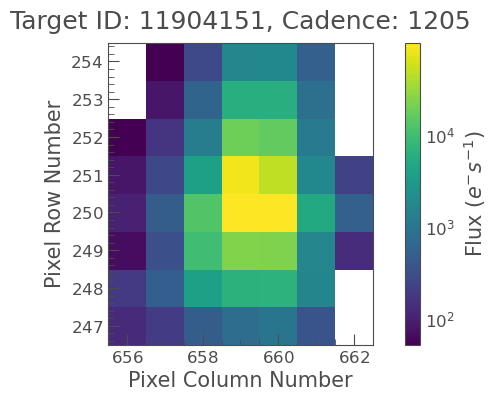

In [173]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [174]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

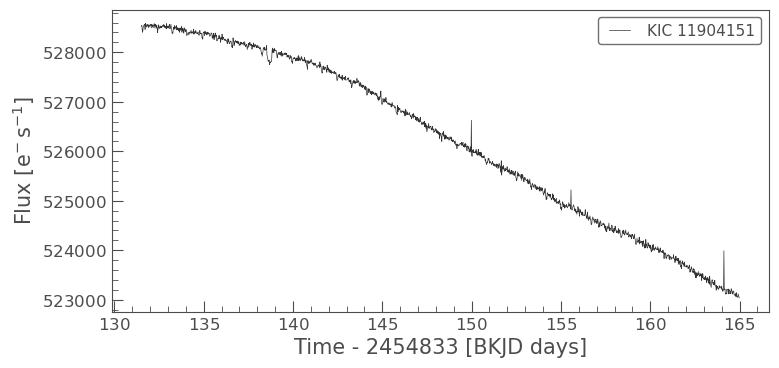

In [175]:
lc.plot();

In [176]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

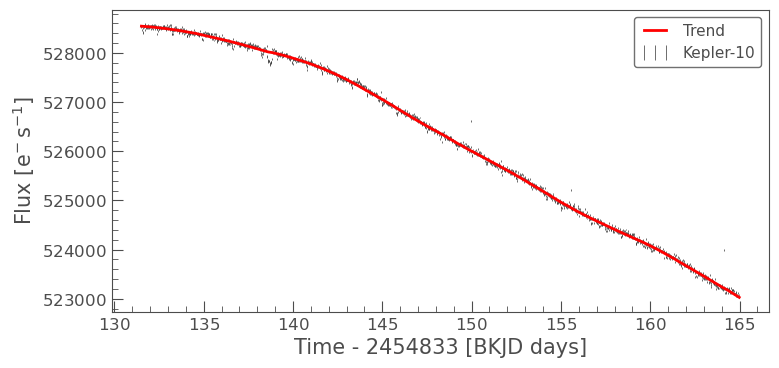

In [177]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

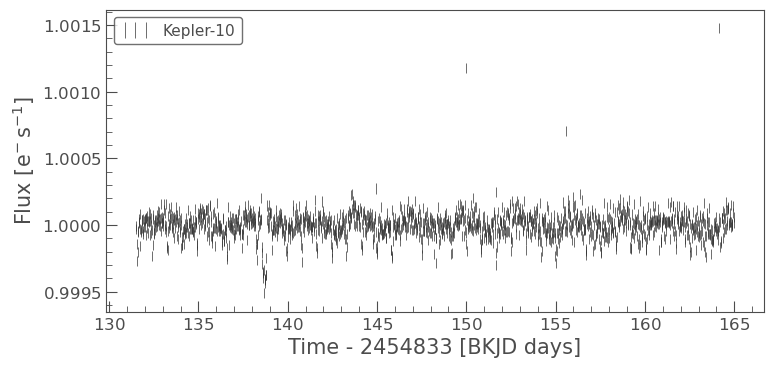

In [178]:
flat.errorbar(label="Kepler-10");

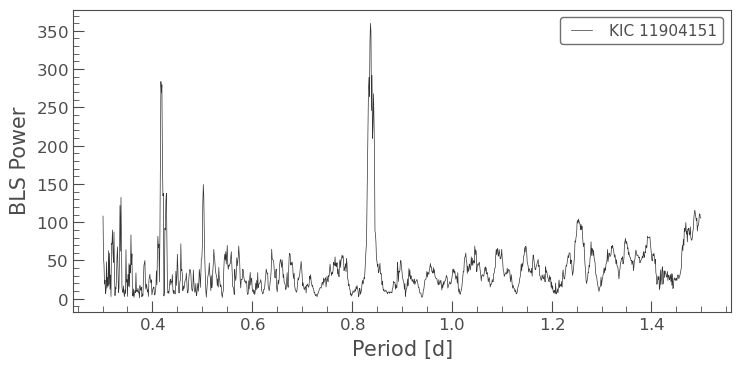

In [179]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.3, 1.5, 0.001))
periodogram.plot();

In [180]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 0.837 d


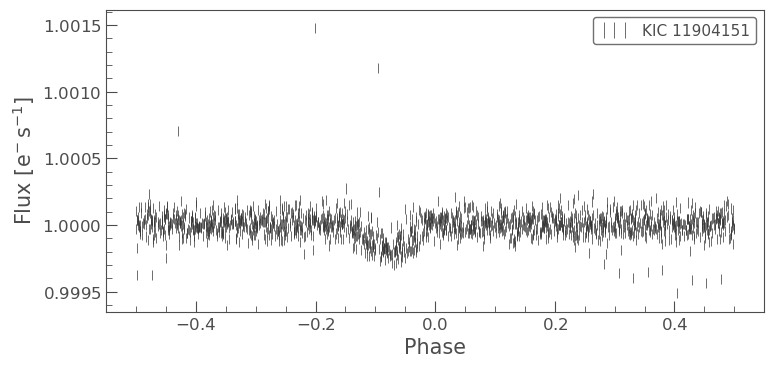

In [181]:
flat.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar();

In [182]:
import stumpy

In [183]:
import pandas as pd

In [184]:
import math

In [188]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile("Kepler-10", quarter=3).download()

In [189]:
print(lcf)

KeplerLightCurveFile(ID: 11904151)


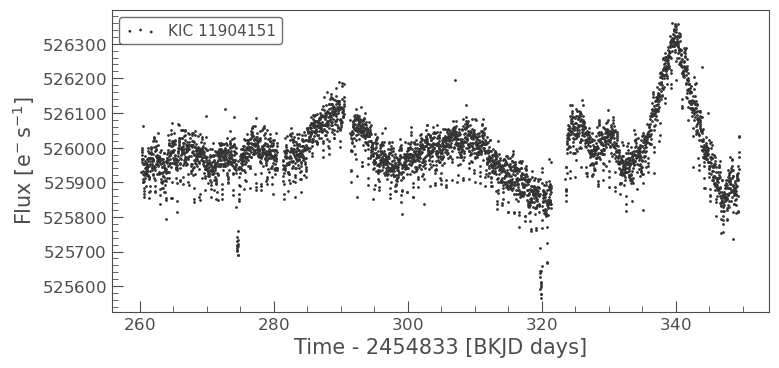

In [190]:
lc = lcf.PDCSAP_FLUX.remove_nans().remove_outliers() #pdc pipeline
lc.scatter();

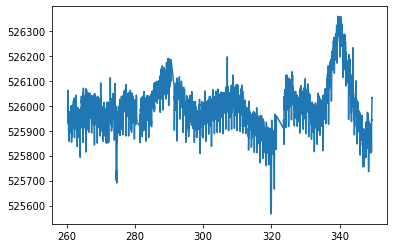

In [191]:
import matplotlib.pyplot as plt
plt.plot(lc.time,lc.flux)

In [192]:
print(lc.flux)

[525931.   525958.1  525968.   ... 525986.25 526033.94 526031.94]


In [193]:
#lc.to_csv(path_or_buf='output.csv')

In [194]:
#light_df = pd.read_csv("output.csv", sep=',')
#light_df['flux'] = light_df['flux'].astype(np.float64)
#light_df['time'] = pd.to_datetime(light_df['time'])
#light_df.head(7000)

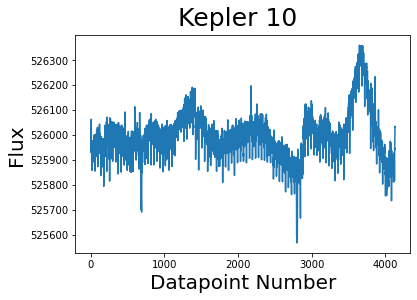

In [195]:
plt.suptitle('Kepler 10', fontsize='25')
plt.xlabel('Datapoint Number', fontsize ='20')
plt.ylabel('Flux', fontsize='20')
plt.plot(lc.flux)

In [196]:
lc.flux

array([525931.  , 525958.1 , 525968.  , ..., 525986.25, 526033.94,
       526031.94], dtype=float32)

In [197]:
import numpy as np

In [198]:
lc.time[1]-lc.time[0] #seperation in time between data points aka the cadence (0.02 days = 30 minutes)

0.020433123856491875

In [213]:
magic_num = 90
mp = stumpy.stump(np.array(lc.flux, dtype='float'), m=magic_num)
true_P = mp[:, 0]

In [214]:
mp[:, 0].max()

10.417380731529512

In [215]:
np.argwhere(mp[:, 0] == mp[:, 0].max()).flatten()[0]

323

In [216]:
mp

array([[8.50592291274388, 1411, -1, 1411],
       [8.491268977079358, 1412, -1, 1412],
       [8.581512848098377, 1413, -1, 1413],
       ...,
       [8.98806921212417, 3474, 3474, -1],
       [8.757702591794523, 3475, 3475, -1],
       [8.651600304760539, 3476, 3476, -1]], dtype=object)

In [217]:
lc.time.shape

(4133,)

In [218]:
mp.shape

(4044, 4)

(0.0, 4044.0)

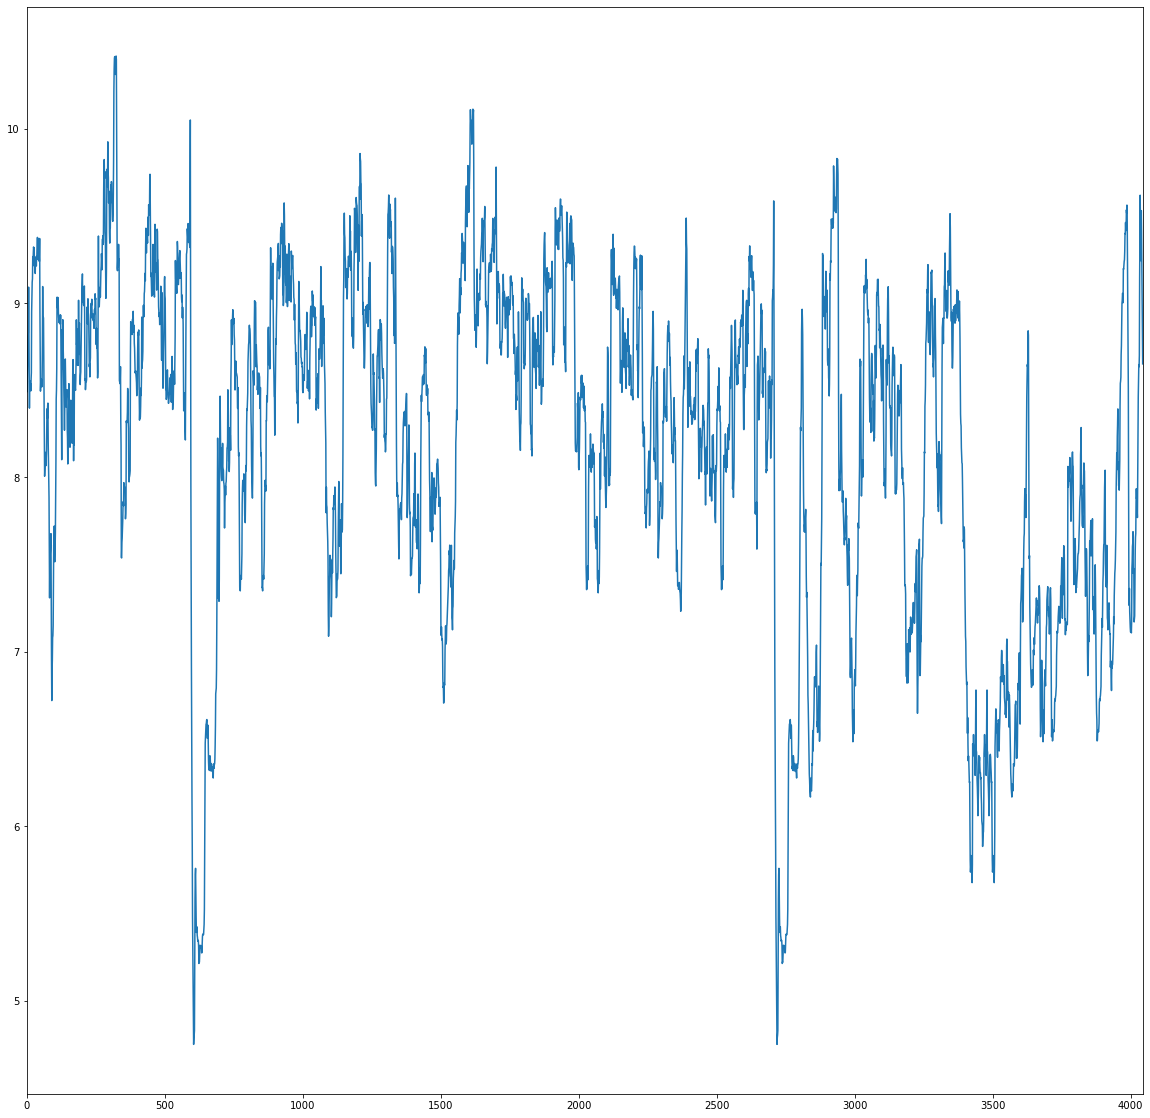

In [259]:
plt.figure(figsize=(20,20))
plt.plot(mp[:,0])
plt.xlim(0,4044)

In [225]:
gooddata = np.where((keplerdata['QUALITY'] == 0))

NameError: name 'keplerdata' is not defined

In [236]:
plt.plot(keplerdata['TIME'][gooddata], keplerdata['PDCSAP_FLUX'][gooddata] )

NameError: name 'keplerdata' is not defined

In [237]:
gooddata = np.where((keplerdata['QUALITY'] == 0) & (keplerdata['TIME'] > 1300))

NameError: name 'keplerdata' is not defined